In [1]:
from QuantLib import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
calc_date = Date(16, 8, 2016)
Settings.instance().evaluationDate = calc_date

In [3]:
day_count = ActualActual(ActualActual.Bond)
rate = 0.035
ts = FlatForward(calc_date, rate, day_count, Compounded, Semiannual)
ts_handle = YieldTermStructureHandle(ts)

In [4]:
callability_schedule = CallabilitySchedule()
call_price = 100.0
call_date = Date(15, September, 2016)
null_calendar = NullCalendar()

for i in range(0, 24):
    callability_price = CallabilityPrice(call_price, CallabilityPrice.Clean)
    callability_schedule.append(Callability(callability_price, Callability.Call, call_date))
    
    call_date = null_calendar.advance(call_date, 3, Months)

In [5]:
issue_date = Date(16, September, 2014)
maturity_date = Date(15, September, 2022)
calendar = UnitedStates(UnitedStates.GovernmentBond)
tenor = Period(Quarterly)
accrual_convention = Unadjusted

schedule = Schedule(issue_date, maturity_date, tenor, calendar, accrual_convention, accrual_convention, DateGeneration.Backward, False)

In [26]:
settlement_days = 3
face_amount = 100
accrual_daycount = ActualActual(ActualActual.Bond)
coupon = 0.1

bond = CallableFixedRateBond(settlement_days, face_amount,
                             schedule, [coupon], accrual_daycount,
                             Following, face_amount, issue_date,
                             callability_schedule)

In [27]:
def value_bond(a, s, grid_points, bond):
    model = HullWhite(ts_handle, a, s)
    engine = TreeCallableFixedRateBondEngine(model, grid_points)
    bond.setPricingEngine(engine)
    return bond

In [28]:
value_bond(0.03, 0.12, 40, bond)
print("Bond Price: ", bond.cleanPrice())

for c in bond.cashflows():
    print(c.date(), "   ", c.amount())

Bond Price:  90.42697932689072
December 15th, 2014     2.4725274725274637
March 16th, 2015     2.499999999999991
June 15th, 2015     2.499999999999991
September 15th, 2015     2.499999999999991
December 15th, 2015     2.499999999999991
March 15th, 2016     2.499999999999991
June 15th, 2016     2.499999999999991
September 15th, 2016     2.499999999999991
December 15th, 2016     2.499999999999991
March 15th, 2017     2.499999999999991
June 15th, 2017     2.499999999999991
September 15th, 2017     2.499999999999991
December 15th, 2017     2.499999999999991
March 15th, 2018     2.499999999999991
June 15th, 2018     2.499999999999991
September 17th, 2018     2.499999999999991
December 17th, 2018     2.499999999999991
March 15th, 2019     2.499999999999991
June 17th, 2019     2.499999999999991
September 16th, 2019     2.499999999999991
December 16th, 2019     2.499999999999991
March 16th, 2020     2.499999999999991
June 15th, 2020     2.499999999999991
September 15th, 2020     2.499999999999

In [29]:
sigmas = np.arange(0.001, 0.15, 0.001)
prices = [value_bond(0.03, s, 40, bond).cleanPrice() for s in sigmas]

Text(0, 0.5, 'Price')

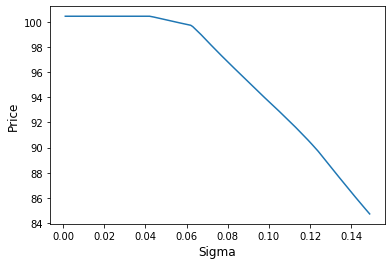

In [30]:
plt.plot(sigmas, prices)
plt.xlabel("Sigma", size=12)
plt.ylabel("Price", size=12)

In [31]:
for c in bond.cashflows():
    print(c.date(), "   ", c.amount())

December 15th, 2014     2.4725274725274637
March 16th, 2015     2.499999999999991
June 15th, 2015     2.499999999999991
September 15th, 2015     2.499999999999991
December 15th, 2015     2.499999999999991
March 15th, 2016     2.499999999999991
June 15th, 2016     2.499999999999991
September 15th, 2016     2.499999999999991
December 15th, 2016     2.499999999999991
March 15th, 2017     2.499999999999991
June 15th, 2017     2.499999999999991
September 15th, 2017     2.499999999999991
December 15th, 2017     2.499999999999991
March 15th, 2018     2.499999999999991
June 15th, 2018     2.499999999999991
September 17th, 2018     2.499999999999991
December 17th, 2018     2.499999999999991
March 15th, 2019     2.499999999999991
June 17th, 2019     2.499999999999991
September 16th, 2019     2.499999999999991
December 16th, 2019     2.499999999999991
March 16th, 2020     2.499999999999991
June 15th, 2020     2.499999999999991
September 15th, 2020     2.499999999999991
December 15th, 2020     2.4